In [21]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

In [26]:
dataSet= pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [27]:
dataSet.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [28]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [29]:
dataSet.shape


(2111, 17)

In [30]:
categoricas = dataSet.select_dtypes(exclude=['number']).copy()
numericas = dataSet.select_dtypes(include=['number']).copy()
numericas.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


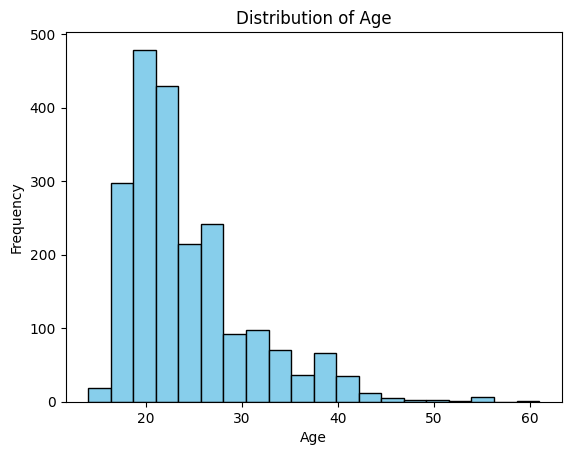

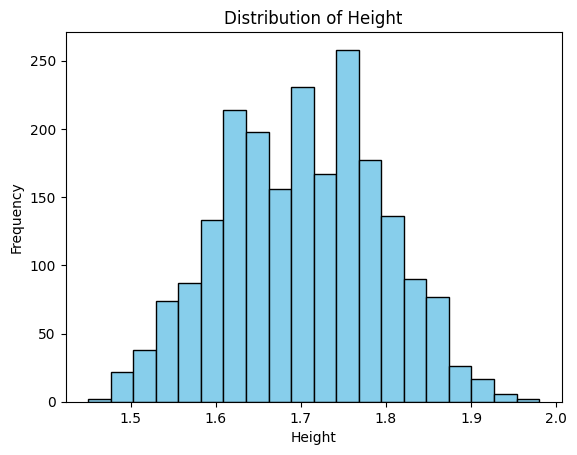

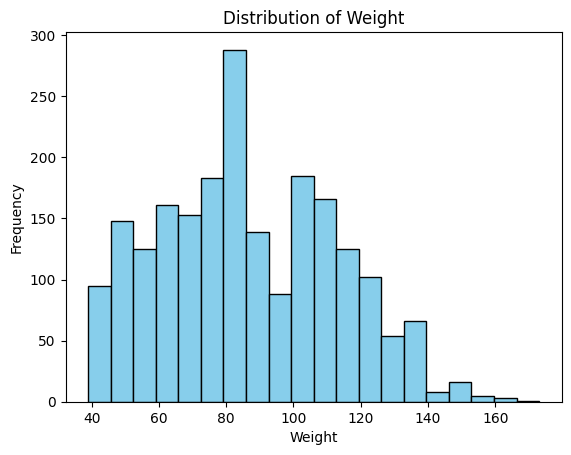

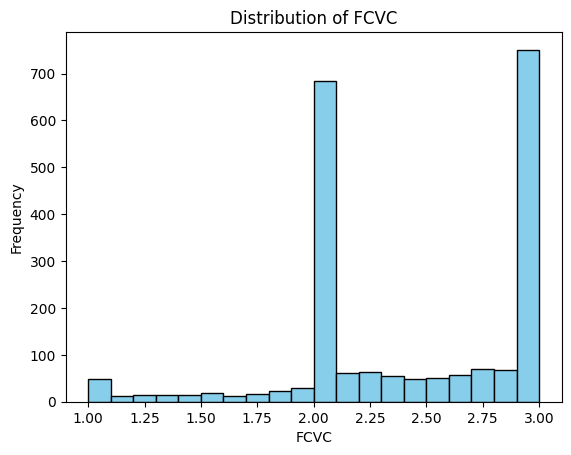

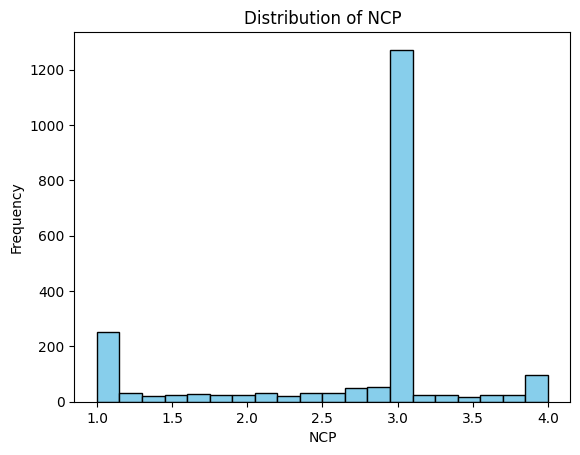

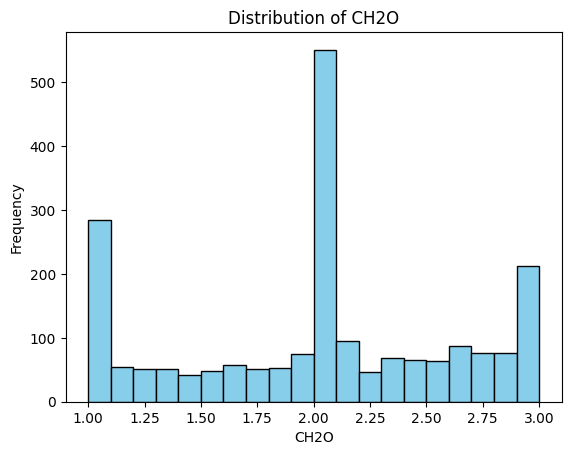

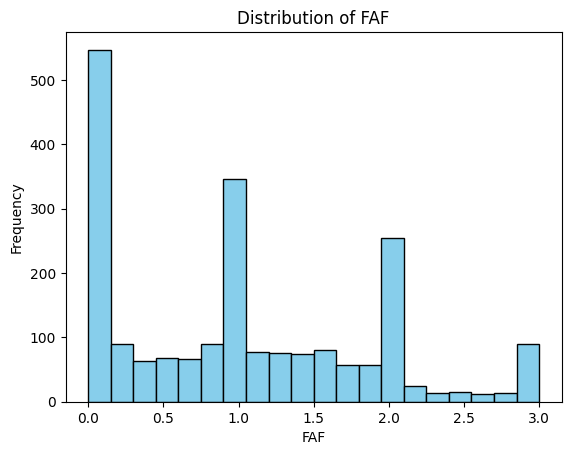

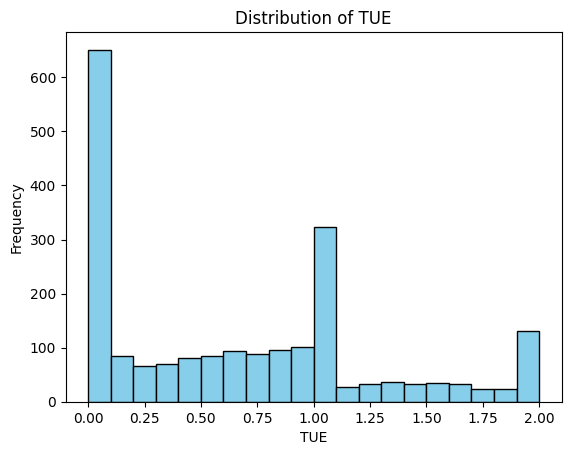

In [31]:
for i in numericas.columns:
    plt.hist(numericas[i], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {i}')
    plt.show()


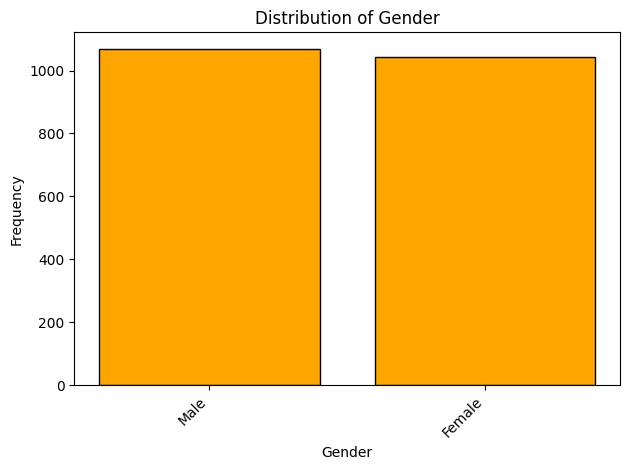

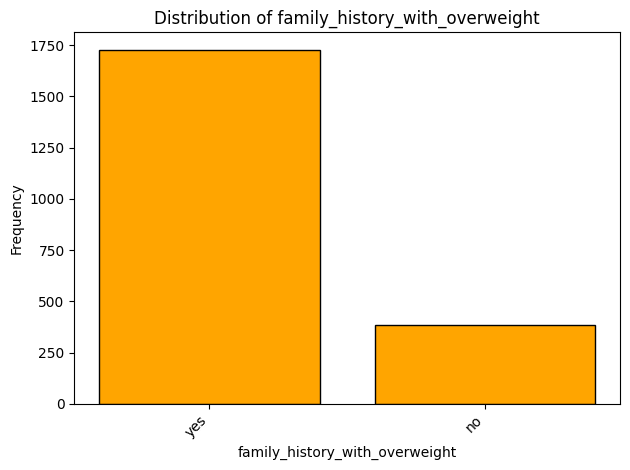

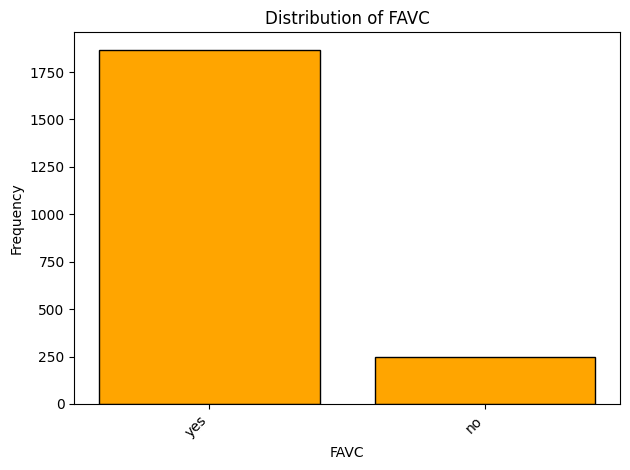

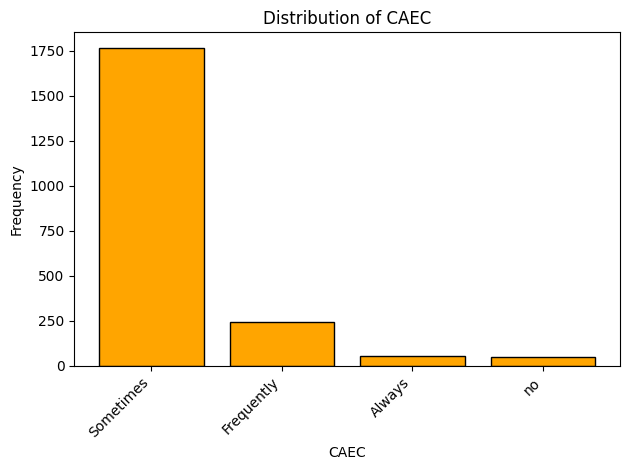

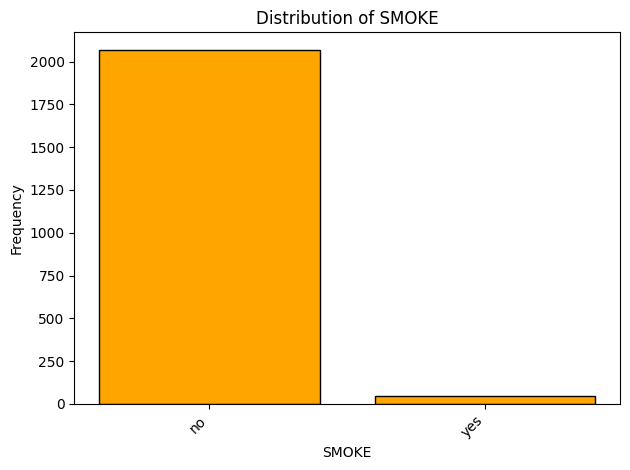

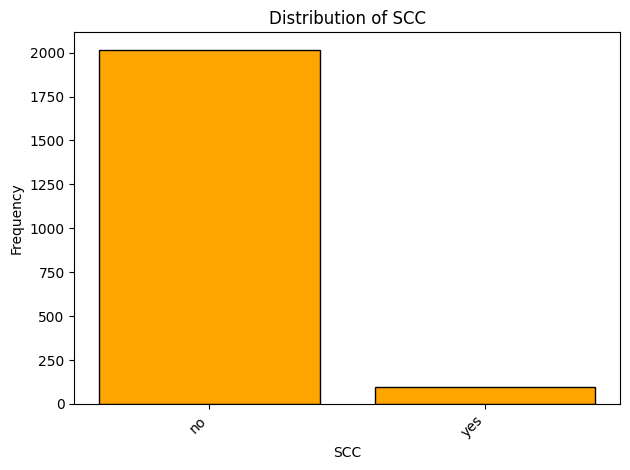

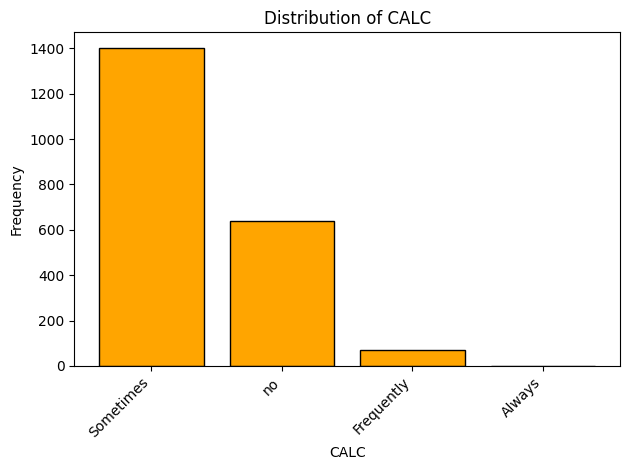

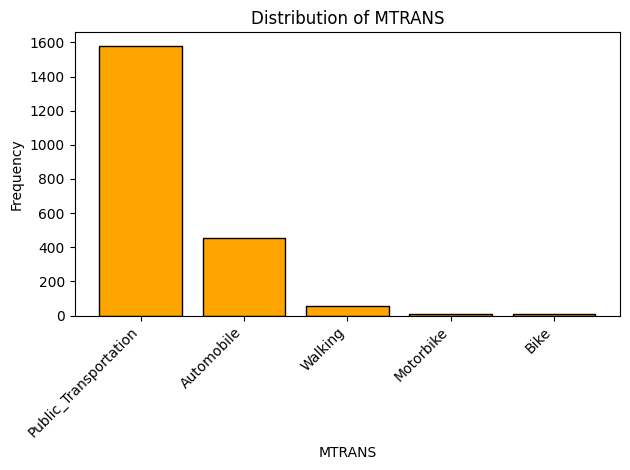

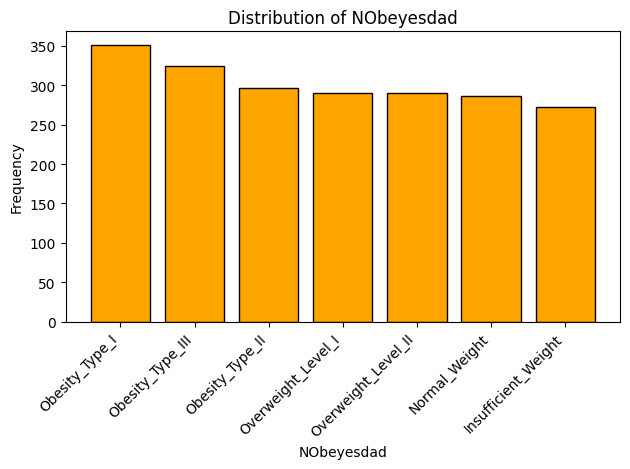

In [32]:
for i in categoricas.columns:
    unique_values = categoricas[i].value_counts()
    plt.bar(unique_values.index.astype(str), unique_values.values, color='orange', edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

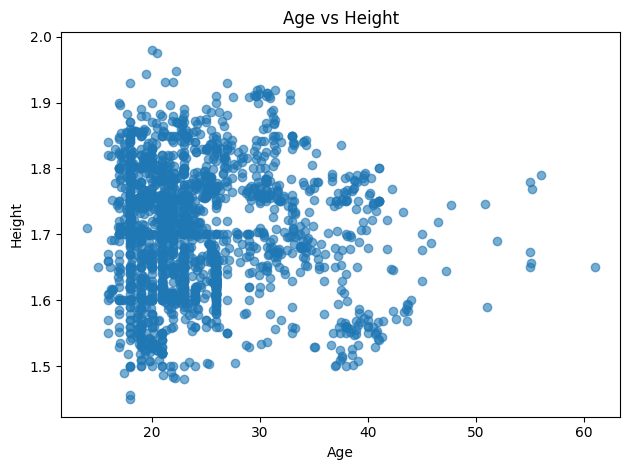

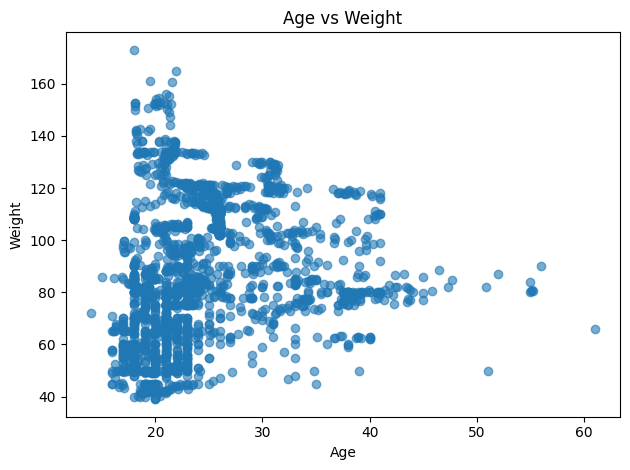

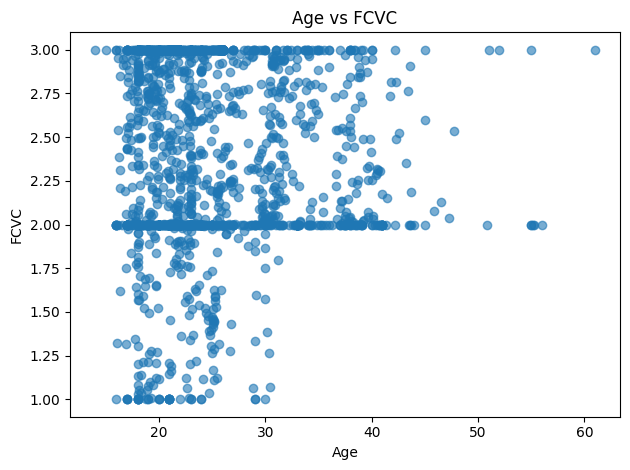

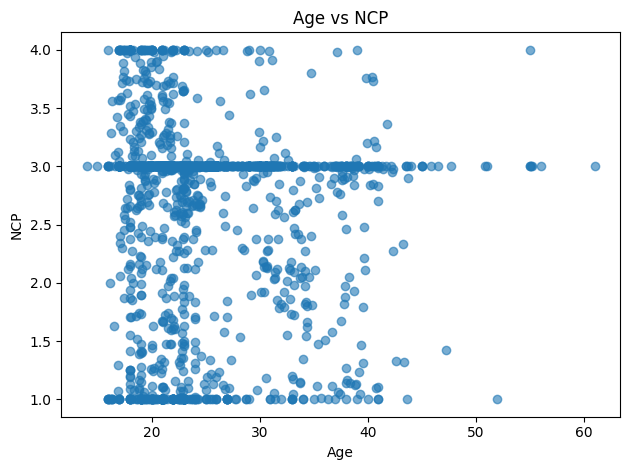

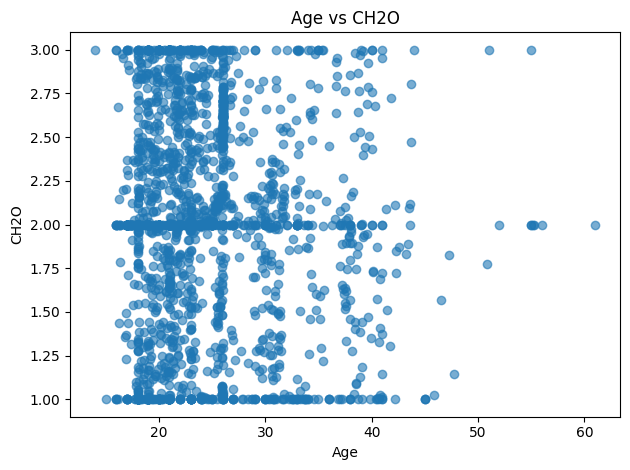

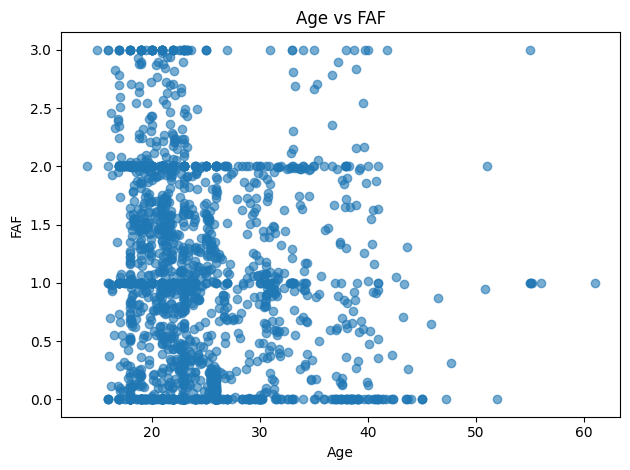

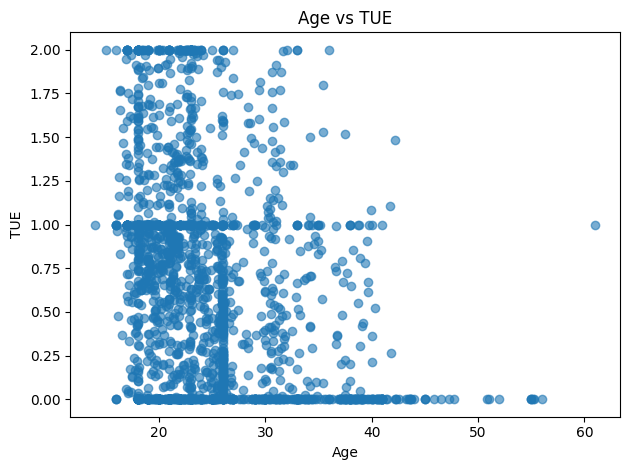

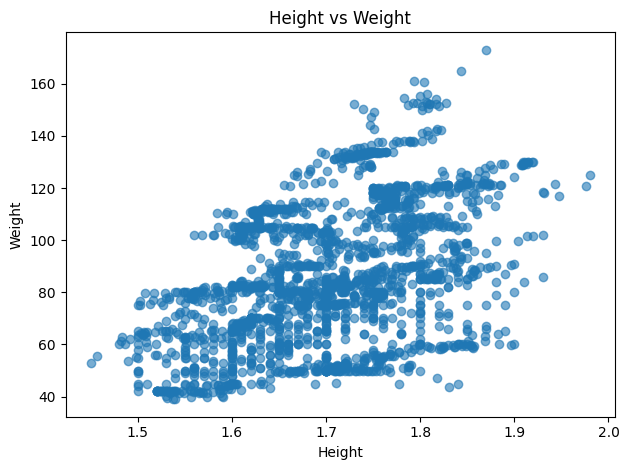

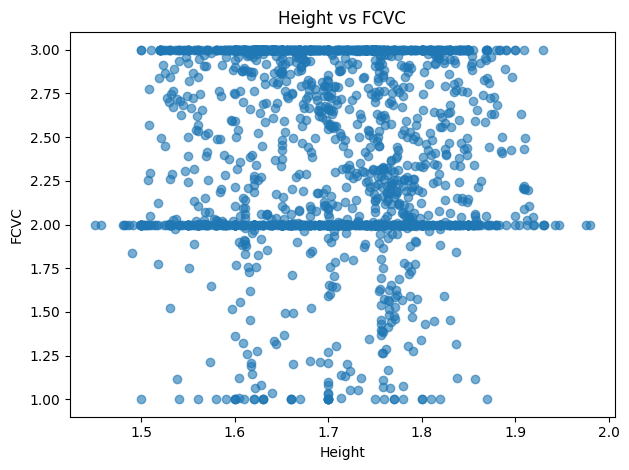

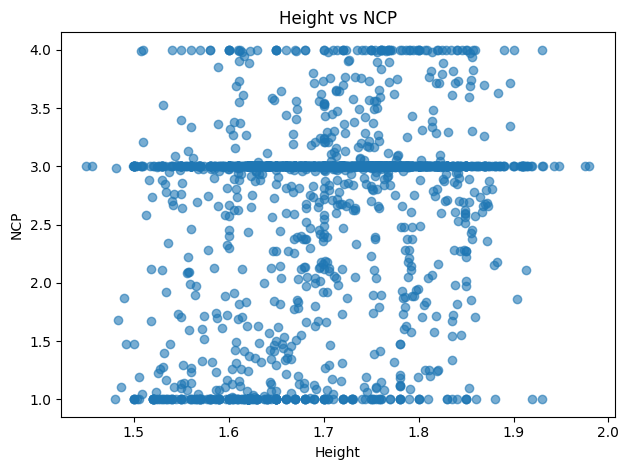

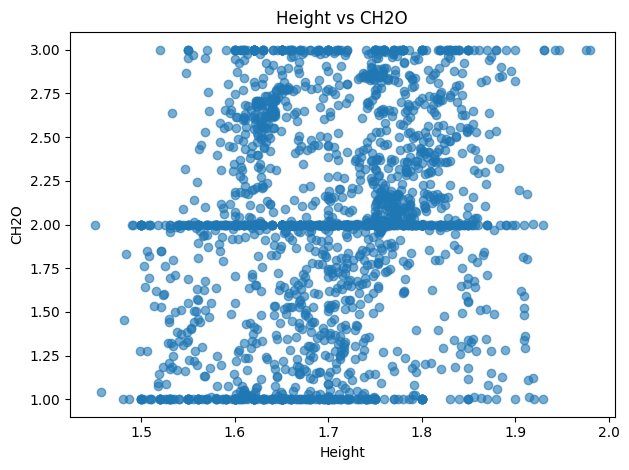

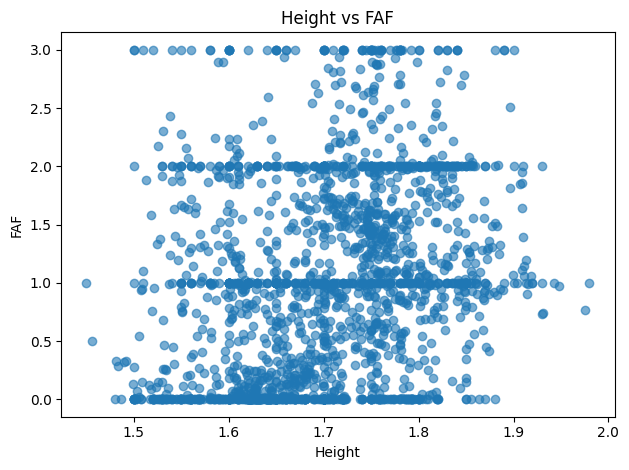

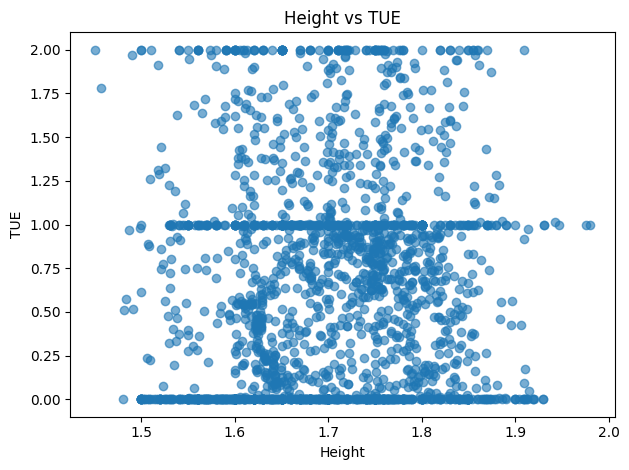

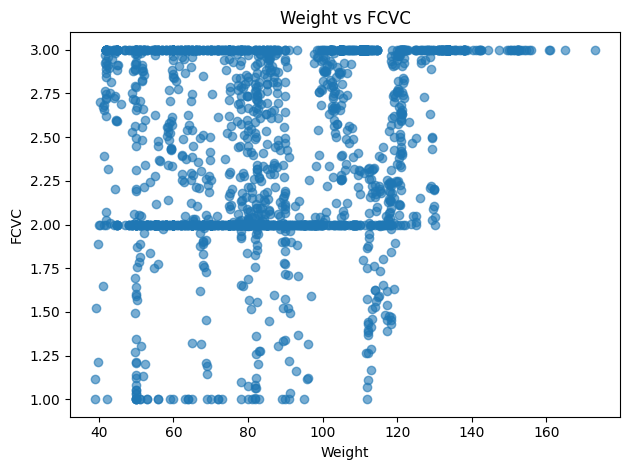

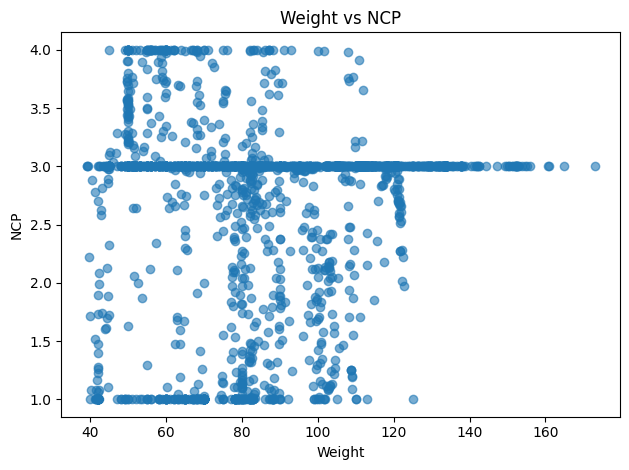

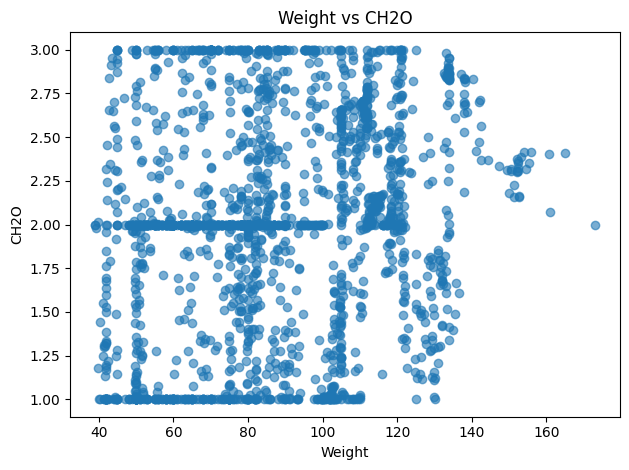

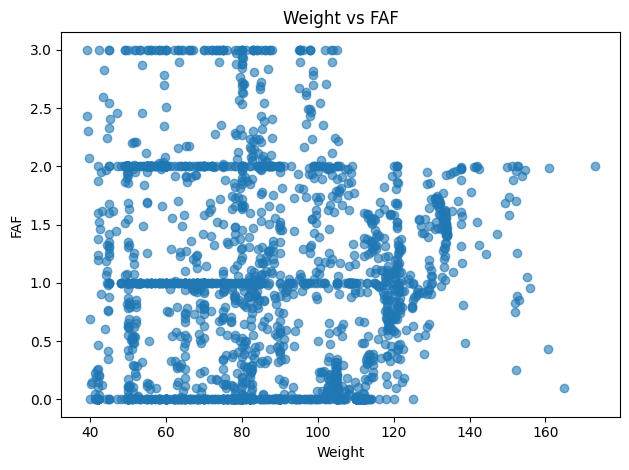

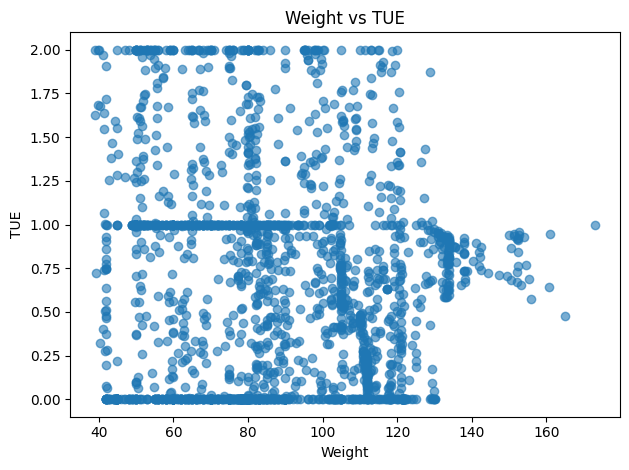

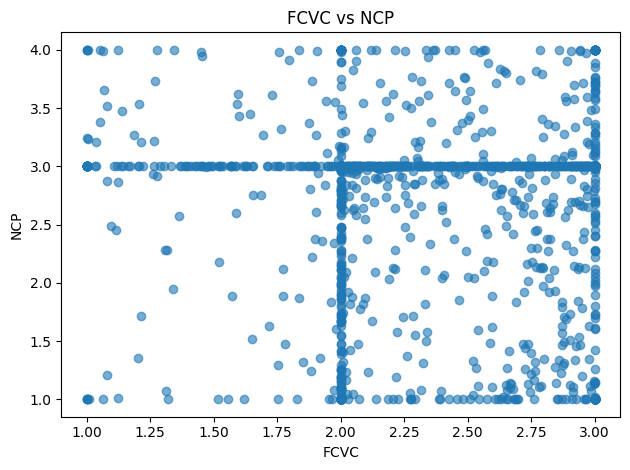

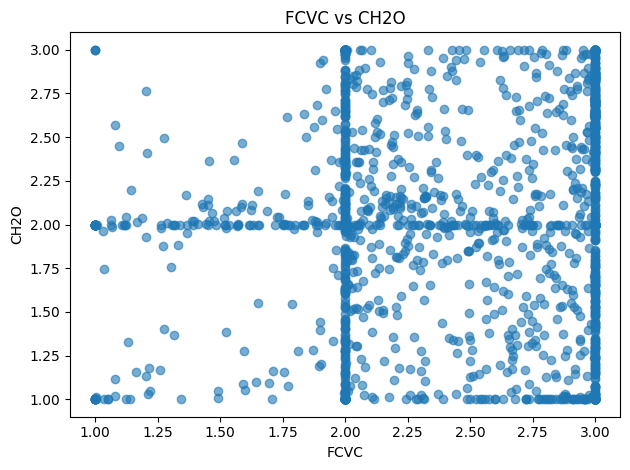

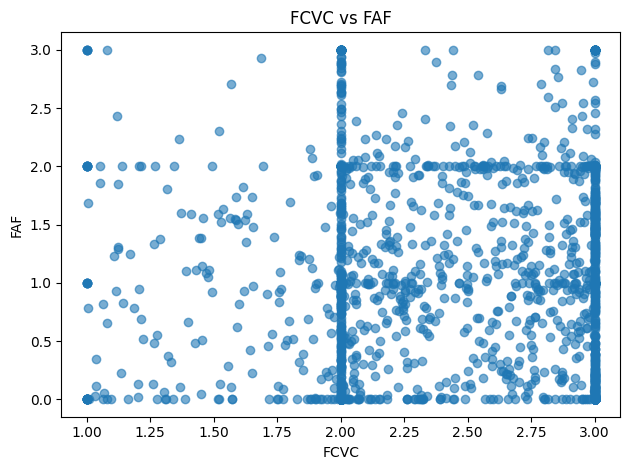

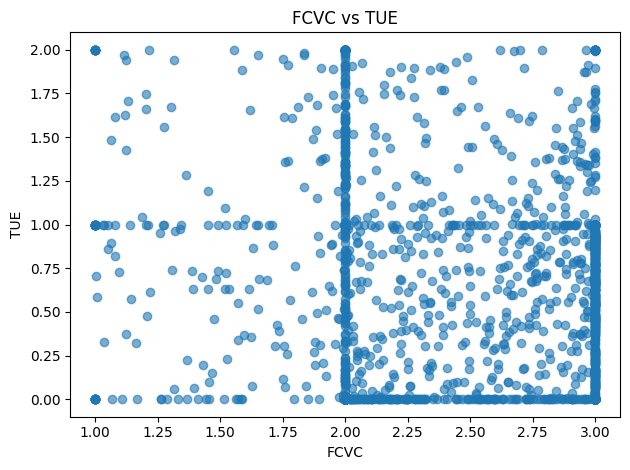

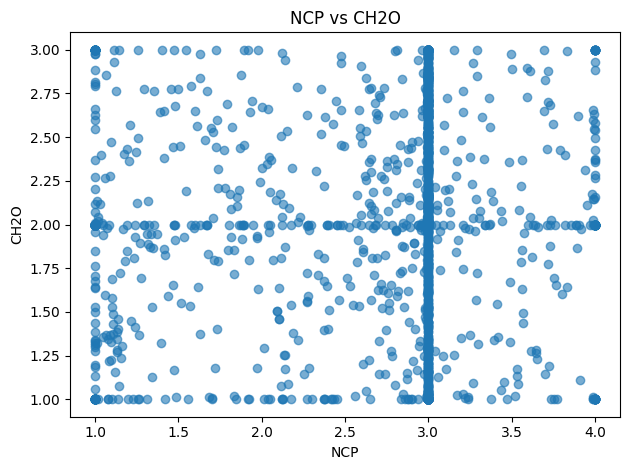

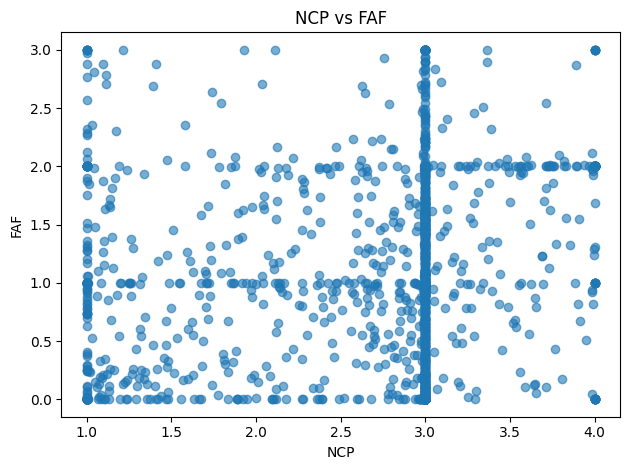

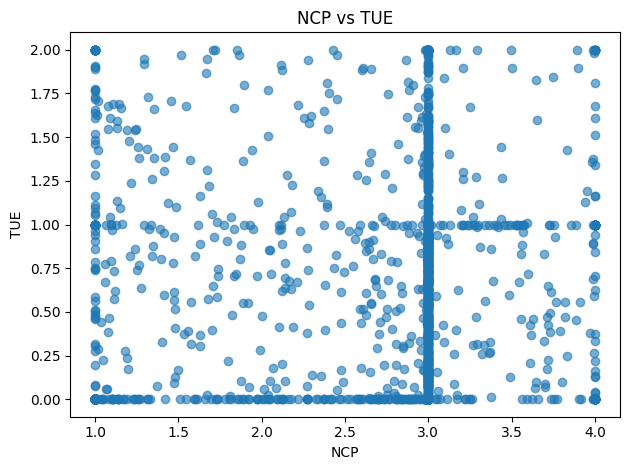

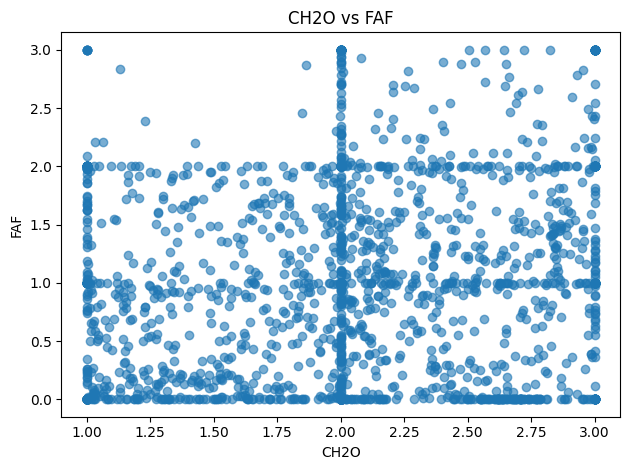

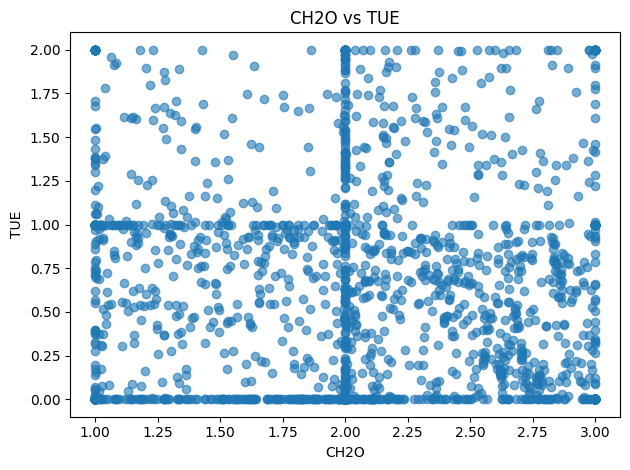

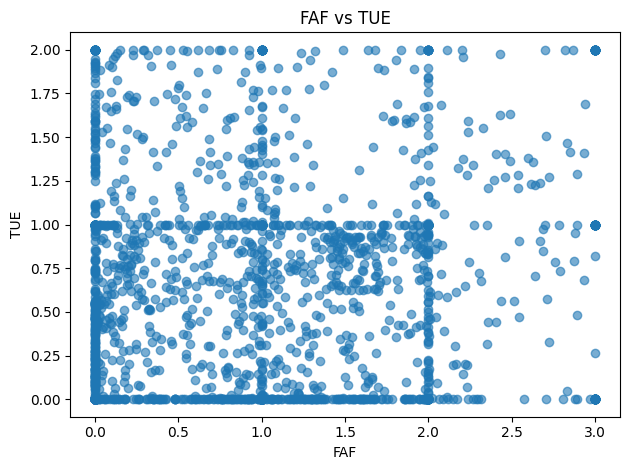

In [33]:
columnas = numericas.columns

for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):  # Evita pares repetidos e iguales (como i==j)
        x = columnas[i]
        y = columnas[j]
        plt.scatter(numericas[x], numericas[y], alpha=0.6)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'{x} vs {y}')
        plt.tight_layout()
        plt.show()

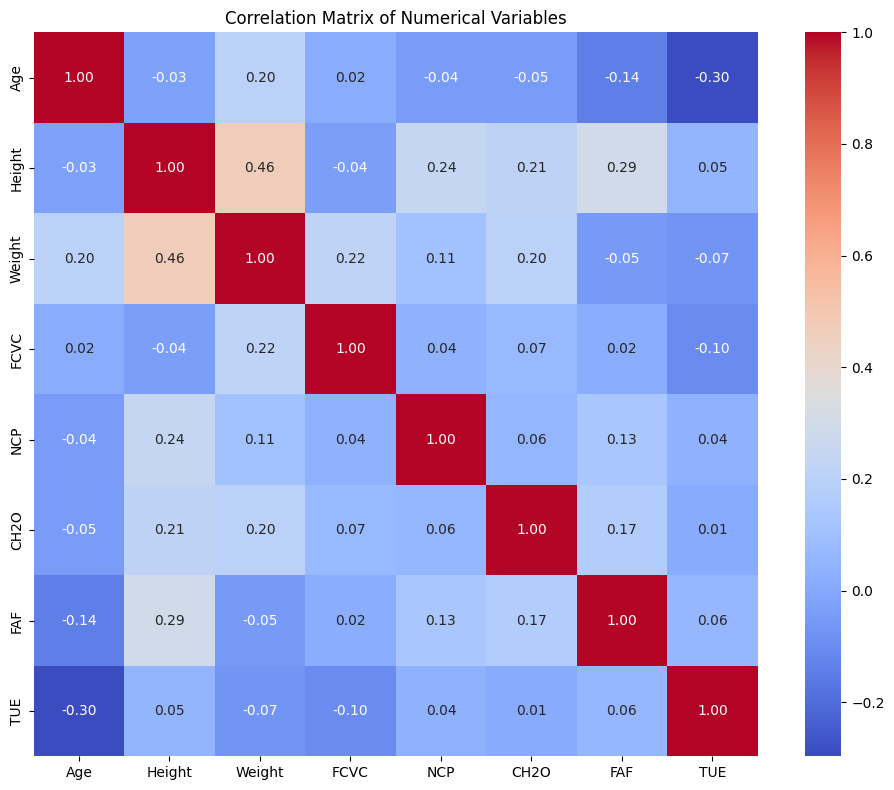

In [34]:
# Calcular la matriz de correlación
correlation_matrix = numericas.corr()

# Dibujar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


**Limpieza de Datos**

1.  Técnicas de selección (Registros)

  Seleccionamos todos los registros del dataset, ya que no existen valores atípicos evidentes ni datos faltantes relevantes. Todos los ejemplos aportan información útil para el entrenamiento del modelo de clasificación de niveles de obesidad.
2.  Técnicas de selección (Atributos)

  Columna NObeyesdad, que representa el nivel de obesidad, es la variable objetivo. Por lo tanto, se separa del conjunto de atributos de entrada, ya que no debe influir en el entrenamiento directo como predictor, sino que es el valor que el modelo intentará predecir y luego validar.





3. Datos Incompletos

  En el código a continuación podemos observar "0" en cada columna indica que no hay valores nulos o faltantes para esa columna. Es decir, todas las columnas tienen el mismo número de registros en total, es decir sin registros perdidos.

  El dataset no tiene datos faltantes, lo cual es positivo porque no tendrás que hacer tratamiento de datos faltantes. Esto facilita el análisis y la modelización posterior.

In [35]:
# Verificar si hay datos faltantes
missing_data = dataSet.isnull().sum()
missing_data_percentage = (missing_data / len(dataSet)) * 100

# Mostrar la información de los datos faltantes
print("Datos faltantes por columna:")
print(missing_data)
print("\nPorcentaje de datos faltantes por columna:")
print(missing_data_percentage)


Datos faltantes por columna:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Porcentaje de datos faltantes por columna:
Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.

4. Datos Redundantes

  Hay datos redundantes, debido a que hay 24 filas duplicada.
  


In [36]:
dataSet.duplicated().sum()

np.int64(24)

In [37]:
duplicated_rows = dataSet[dataSet.duplicated()]
print(duplicated_rows)


     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0                   

In [38]:
dataSet = dataSet.drop_duplicates()


In [39]:
dataSet.duplicated().sum()


np.int64(0)

5. Datos Inconsistentes

  No hemos encontrado datos inconsistentes porque cuando hacemos las comprobaciones mediante código no nos salen ni números raros ni palabras raras. Como por ejemplo en altura que alguien mida 5 metros o que haya un genero que sea otra cosa distinta a Female y Male. Es decir no hay datos incosistentes
  


In [40]:
# Filtrar valores inconsistentes
print("\nAlturas menores a 1.0 metro o mayores a 2.5 metros:")
print(dataSet[(dataSet['Height'] < 1.0) | (dataSet['Height'] > 2.5)])

print("\nEdades menores a 5 o mayores a 100:")
print(dataSet[(dataSet['Age'] < 5) | (dataSet['Age'] > 100)])

print("\nPesos menores a 30kg o mayores a 200kg:")
print(dataSet[(dataSet['Weight'] < 30) | (dataSet['Weight'] > 200)])

print("\nValores inusuales en FCVC (esperado: entre 1.0 y 3.0):")
print(dataSet[(dataSet['FCVC'] < 1.0) | (dataSet['FCVC'] > 3.0)])

print("\nValores inusuales en NCP (esperado: entre 1 y 5):")
print(dataSet[(dataSet['NCP'] < 1) | (dataSet['NCP'] > 5)])



Alturas menores a 1.0 metro o mayores a 2.5 metros:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []

Edades menores a 5 o mayores a 100:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []

Pesos menores a 30kg o mayores a 200kg:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []

Valores inusuales en FCVC (esperado: entre 1.0 y 3.0):
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []

Valores inusuales en NCP (esperado: entre 1 y 5):
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_hist

In [41]:
# Revisar valores únicos por columna categórica
categoricas = dataSet.select_dtypes(exclude=['number'])
for col in categoricas.columns:
    print(f"\nValores únicos en '{col}':")
    print(dataSet[col].unique())



Valores únicos en 'Gender':
['Female' 'Male']

Valores únicos en 'family_history_with_overweight':
['yes' 'no']

Valores únicos en 'FAVC':
['no' 'yes']

Valores únicos en 'CAEC':
['Sometimes' 'Frequently' 'Always' 'no']

Valores únicos en 'SMOKE':
['no' 'yes']

Valores únicos en 'SCC':
['no' 'yes']

Valores únicos en 'CALC':
['no' 'Sometimes' 'Frequently' 'Always']

Valores únicos en 'MTRANS':
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

Valores únicos en 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


6. Errores de Transcripción



7. Variaciones en las referencias a los mismo conceptos


8. Valores atípicos



** Transformación de Datos**

Solo vamos a hacer la transformación de datos categóricos a numéricos.

1. Datos categóricos a numéricos

In [42]:
from sklearn.model_selection import train_test_split

X = dataSet.drop(columns=['NObeyesdad'])
Y = dataSet['NObeyesdad']

In [43]:
X = pd.get_dummies(X, dtype = int)
X.head ()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0


**Normalización de datos**



In [44]:
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(X)
datos_normalizados

array([[0.14893617, 0.32075472, 0.18656716, ..., 0.        , 1.        ,
        0.        ],
       [0.14893617, 0.13207547, 0.12686567, ..., 0.        , 1.        ,
        0.        ],
       [0.19148936, 0.66037736, 0.28358209, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.18136247, 0.5702    , 0.70663696, ..., 0.        , 1.        ,
        0.        ],
       [0.22046672, 0.54613208, 0.70407941, ..., 0.        , 1.        ,
        0.        ],
       [0.20563211, 0.54497358, 0.70501971, ..., 0.        , 1.        ,
        0.        ]], shape=(2087, 31))

In [45]:
dataSet.to_csv('datos_normalizados.csv', index=False)

In [46]:
dt = pd.read_csv('datos_normalizados.csv')
dt.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [47]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X.shape, X_train.shape, X_test.shape

((2087, 31), (1460, 31), (627, 31))

In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh= KNeighborsClassifier()
neigh.fit(X_train, Y_train)

Y_pred = neigh.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 86,   1,   0,   0,   0,   0,   0],
       [ 23,  41,   0,   0,   0,  22,   9],
       [  0,   0, 102,   0,   1,   0,   2],
       [  0,   0,   4,  90,   0,   0,   1],
       [  0,   0,   0,   0,  91,   0,   0],
       [  0,   1,   2,   0,   0,  69,   8],
       [  0,   3,   6,   0,   0,   3,  62]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8628389154704944

In [51]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, Y_pred)

np.float64(0.8627456464019855)

La mejor opción a elegir es la de balanced_accuracy_score debido a que nos da una predicción correcta de ambas clases ya que al haber más datos de una clase que de otra si utilizamos la de accuracy_score tendremos una distorsión del pocentaje de acierto.

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(2,6)}
neigh= KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, scoring='balanced_accuracy')
clf.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 6)},
             scoring='balanced_accuracy')

In [53]:
neigh= KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

Y_pred = neigh.predict(X_test)
Y_pred

array(['Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Insufficient_Weight', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Obesity_Type_III', 'Insufficient_Weight',
       'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_I',
       'Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_II',
       'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_II',
       'Overweight_Level_II', 'Overweight_Level_I', 'Obesity_Type_III',
       'Overweight_Level_II', 'Insufficient_Weight',
       'Insufficient_Weight', 'Obesity_Type_I', 'Obesity_Type_I',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Obesity_Type_I', 'Normal_Weight',
       'Overweight_Level_I', 'Obesity_Type_I', 'Obesity_Type_II',
       'Overweight_Level_II', 'Obesity_Type_III', 'Normal_Weight',
       'Normal_Weight', 'Insufficient_Weight', 'Normal_Weight',
       'Insufficient_Weight', 'Obesity_Type_I', 'Overweight_Level_I',
       'Ob

In [54]:
confusion_matrix(Y_test, Y_pred)

array([[ 85,   2,   0,   0,   0,   0,   0],
       [ 21,  44,   0,   0,   0,  22,   8],
       [  0,   0, 100,   1,   1,   0,   3],
       [  0,   0,   2,  93,   0,   0,   0],
       [  0,   0,   0,   0,  91,   0,   0],
       [  0,   1,   0,   0,   0,  72,   7],
       [  0,   2,   5,   0,   0,   1,  66]])

In [55]:
accuracy_score(Y_test, Y_pred)

0.8787878787878788

In [56]:
balanced_accuracy_score(Y_test, Y_pred)

np.float64(0.8804842288119447)

Podemos ver que el hay una mejora pequeña, pero importante teniendo en cuenta que nos acercamos más al 1, lo que implica que tendrá una buena tasa de acierto. Tanto fijandonos en el accuracy como en el balanced, pero como hemos dicho antes hay que fijarse más en el balanced y en este caso tiene una mayor tasa de acierto que el accuracy

## Modelo de Regresión y Evaluación

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import make_regression

In [58]:
X, y = make_regression(n_samples=5, n_features=2, noise=1, random_state=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [61]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print("Mean Absolute Error (MAE): ",mae)
print("R Score:" ,r2)

Mean Absolute Error (MAE):  17.233813144554997
R Score: 0.6660405872578263


Las predicciones del modelo se desvian del valor real por 17.23 unidades utilizando el MAE

## Modelo de Clusterización y Evaluación

In [66]:
X_cluster = datos_normalizados

In [71]:
inercia = []
k_rango = range(2,11) # todo: revisar número
coeficientes_siluetas = []

In [73]:
from sklearn.cluster import KMeans

for k in k_rango:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inercia.append(kmeans.inertia_)
    puntuacion = coeficientes_siluetas(datos_normalizados, kmeans.labels_)
    coeficientes_siluetas.append(puntuacion)

# Gráfica para escoger el mellor número de clústers
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(k_rango, inercia, marker='o')
plt.title('Método do Cóbado')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')

plt.subplot(1,2,2)
plt.plot(k_rango, coeficientes_siluetas, marker='o', color='green')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

TypeError: 'list' object is not callable